# Quantum Oscillator

Earlier, we developed code to find the solution to Schrodinger for a quadratic well given the energy level, E. It uses odeint to simply integrate the diff eq. However, we need to specify the values of E! What is special about these values of E? What happens if we choose E = 200?

## Shoot and Correct

One way to find the eigenvalues for the problem is to guess something and see if it works. Nature can work this way, where we might particles of various energies, but only those with discrete values are trapped. Here's a version of code to the Schrodinger equation solver we developed earlier for a parabolic well given the value of E. In this version,  the energy level is given as a user input, and the program keeps looping so you can try different values and plot the resulting wave equation. Can you find the three lowest energy levels? Before you start, what would the 3 wave functions look like? If the particle is trapped, what is the probability of finding it far from x=0?
<br><br>
Try values of E near 100, 400, and 700.

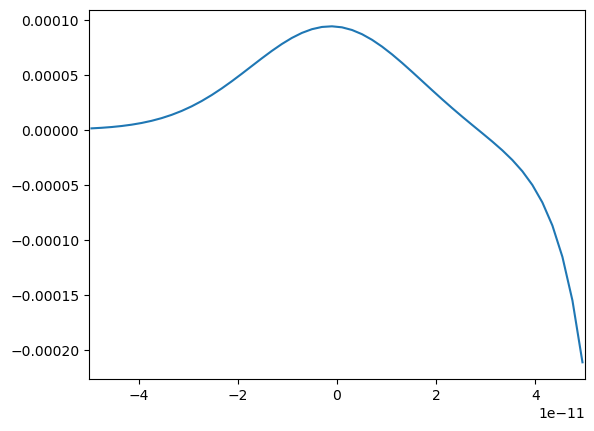

In [2]:
from scipy.integrate import odeint
from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, xlim

for i in range(50):
    inp=input('E? (E<0 to end): ')
    E=float(inp)
    
    if E<0:
        break
    
    def schrodinger(x, V):
        # unpack
        psi = V[0]
        psi_p = V[1]
                    
        # compute rates
        Pot=V0*(x**2/a**2)
        dpsi_p = -(2*m/hbar**2)*(E-Pot)*psi
        dpsi = psi_p
            
        # pack rates into column vector
        rate = array([dpsi, dpsi_p])
        return rate
    
    # set some parameters
    V0= 50
    a=1.e-11 # m
    hbar=197*1e-9 # hbar-c
    m=0.511*1e6 # eV/c2
    
    
    # set initial conditions
    
    p0 = 0
    dp0 = 1
    Y0 = array([p0, dp0]) # pack the i.c. into array
    
    
    # set the time interval for solving
    Xstart=-10*a
    Xend = 10*a # 2 years
    
    # Form Time array
    
    X = linspace(Xstart,Xend,100)
    
    # solve the ODE for 3 values of E and
    # make some nice plots
        
    out = odeint(schrodinger, Y0, X, tfirst=True)
    p = out[:,0]
    dp = out[:,1]
    plot(X[25:-25],p[25:-25], label='E='+str(round(E,1)))
    xlim(-5*a,5*a)
    show()

## Eigenvalue Solution

Instead we want to use an eigen value approach using matrices. The Schödinger equation is
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2\Psi}{dx^2} + V(x)\Psi=E\Psi
\end{equation}

As with the Heat Equation, we can discretize the Schrödinger equation by letting $x \longrightarrow x_0,x_1,x_2,...x_N$ and $V(x_j)=V_j$. For all j this is a system of equations. In Marix form,  the second derivative becomes the matrix operator,

\begin{equation}
D = \frac{1}{dx^2} \begin{pmatrix}
-2 & 1& 0 & 0 & \cdots & 0& 0 \\
1 & -2 & 1& 0 & \cdots & 0 & 0\\
0 &1 & -2 & 1& \cdots & 0 & 0\\
0 & 0 &1 & -2 & \cdots & 0 & 0\\
\vdots  & \vdots & \vdots & \vdots  & \ddots & \vdots & \vdots  \\
0&0 & 0 & 0&\cdots & -2 & 1 \\
0&0 & 0 & 0&\cdots & 1 & -2 
\end{pmatrix}
\end{equation}

The term $V_j\Psi(x_j)$ requires a matrix V with $V_j$ on the diagonal.

\begin{equation}
V=\begin{pmatrix}
V_1 &  0&  \cdots & 0 \\
0 & V_2 &  \cdots & 0\\
\vdots  & \vdots  & \ddots &   \vdots  \\
0&0 & \cdots &  V_N \\
\end{pmatrix}
\end{equation}

Recall that E is just a real number. So, we get

\begin{equation}
H \Psi=E\Psi
\end{equation}

Where
\begin{equation}
H = -\frac{\hbar}{2m} D + V
\end{equation}

Is the Hamiltonian matrix.

### Python

In [ ]:
from numpy import (linspace,log,exp,sin,cos,sqrt,pi,e, 
                   arange, zeros_like, ones, eye, diag, matmul, argsort)
from numpy.linalg import eig

Let's assume a quadratic well as above, with 
\begin{equation}V(x)=V_o\:\frac{x^2}{a^2},\:\:\:\:\:\:\:V_{o\:}=50\:eV\end{equation}
for $a=1.\times10^{-11}$ an electron radius and $m=0.511\times10^6  eV/c^2$ the electron mass. Furture, we will solve on the domain $-10a\:<\:x\:<\:10a$.
<br><br>
The following code sets these constants 

In [ ]:
# Parameters 
a=1.e-11 # m size of electron
hbar=197*1e-9 # hbar-c
m=0.511*1e6 # eV/c2

# x coordinate
L = 20*a # Total distance
N = 101 # number of x values
dx = L/(N-1) # one less step than x values

x = linspace(-L/2,L/2, N) # -L/2 to L/2 by steps of dx...N elements

Next make an array of the $V$ values for each $x$

In [ ]:
V0 = 50 # eV
Vpot = V0*(x**2/a**2)

Now create the Hamiltonian and get its eigenvalues (w) and eigenvectors (v)

In [ ]:
Tdiag = eye(N,N,1) - 2*eye(N) + eye(N,N,-1)
    
H = -(hbar**2.)/(2.*m) * Tdiag/dx**2 + diag(Vpot)

w,v = eig(H)

We want to sort this on the size of the eigenvalues to get the lowest few energy states. To do this, create a list of indices (idx) for the elements of w sorted by size. So w[idx[0]] is the smallest eigenvalue and v[idx[0]] is the corresponding eigenvector.

In [ ]:
idx=argsort(w)
E = w[idx[:5]]
Psi = v[:,idx[:5]]

And finally, make a nice plot.

In [ ]:
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot
for i in range(3):
    plot(x,Psi[:,i], label='E='+str(round(E[i],1)))
legend()